In [1]:
#Rebuild NEURON-based Cell
import numpy as np
from neuron import h
import simulation as sim
import matplotlib.pyplot as plt
import stimulus_pulse as sp
import extracellular as ex
import helperFuncs as hf

for sec in h.allsec():
   h.delete_section(sec=sec)

--No graphics will be displayed.


In [2]:
RGC = sim.Local_Cell()
filename = 'cell_param_files/params_35_v2.csv'
axon_coords = RGC.build_cell(filename, 'mammalian_spike_35')
# RGC.shift_cell_x_y_z(0+x_shift,0,0)

After any change to cell geometry or nseg, be sure to invoke setpointers()
[[-0.01194     0.          0.02      ]
 [-0.01227408  0.          0.02094255]
 [-0.01275496  0.          0.02181933]
 ...
 [-3.05527043  0.          0.03994091]
 [-3.05627043  0.          0.03994091]
 [-3.05727043  0.          0.03994091]]


# Convert to SWC

In [3]:
from hoc2swc import neuron2swc

neuron2swc("n_rgc.swc")

Wrote cell 0 to n_rgc.swc


# Simplify and Clean the SWC File

In [4]:
import jaxley as jx
from jaxley.morphology import morph_delete, morph_connect
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [5]:
cell = jx.read_swc(
    "n_rgc.swc", 
    ncomp = 20, 
    min_radius= 0.005,
    assign_groups=True)


# Visualize

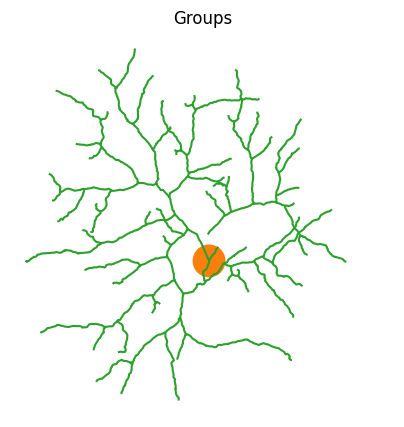

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.cm.tab10.colors
cell.basal.vis(ax=ax, color=colors[2])
cell.soma.vis(ax=ax, color=colors[1])
# cell.axon.vis(ax=ax, color=colors[0])

plt.axis("off")
plt.title("Groups")
plt.axis("square")
plt.show()

In [6]:
params = pd.read_csv('cell_param_files/params_35_v2.csv')
mod_file = 'mammalian_spike_35'
print(axon_coords)
offset = 0

[[-0.01194     0.          0.02      ]
 [-0.01227408  0.          0.02094255]
 [-0.01275496  0.          0.02181933]
 ...
 [-3.05527043  0.          0.03994091]
 [-3.05627043  0.          0.03994091]
 [-3.05727043  0.          0.03994091]]


# Build Biophysics For Dendrites

# Build Biophysics For Soma


# Build Biophysics For Axon Hillcock


# Build Morphology For Axon Hillcock



In [14]:
from morphology_generators.axon_hillcock import build_Axon_Hillcock
ah_params = params.iloc[2]
ah_length = int(ah_params['length'])
print(type(ah_length))
ah_diameter = float(ah_params['diameter'])

builder = build_Axon_Hillcock(axon_coords, ah_length, ah_diameter)
ah = builder.create_branch()
offset += ah_length


<class 'int'>


In [9]:
ah.compute_xyz()

fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")  # 3-D axes
ah.vis(ax=ax,                 # what to draw
         type="line",           # 'line', 'morph', 'comp', 'scatter' …
         dims=[2, 0, 1])        # order of axes → z, x, y

# tweaks that make the picture nicer
ax.view_init(elev=20, azim=45)   # camera angle
ax.set_box_aspect([1, 1, 1])     # keep x-, y-, z-scales equal
plt.show()

NameError: name 'ah' is not defined

In [10]:
print(cell._dhs_solve_indexer["node_order"].shape)
print(ah._dhs_solve_indexer["node_order"].shape)

(2479, 3)


NameError: name 'ah' is not defined

# Build Biophysics For SOCB


# Build Morphology For SOCB


In [15]:
from morphology_generators.socb import SOCB_Build
socb_params = params.iloc[3]
socb_length = int(socb_params['length'])
socb_diameter = float(socb_params['diameter'])
nr_params = params.iloc[4]
nr_diameter = float(nr_params['diameter'])

scaling_factor = (ah_diameter - nr_diameter)/socb_length

builder = SOCB_Build(axon_coords, socb_length, socb_diameter, offset, scaling_factor)
socb = builder.create_branch()
offset += socb_length

ValueError: not enough values to unpack (expected 7, got 6)

# Build Biophysics For NR


# Build Morphology For NR


In [ ]:
from morphology_generators.nr import NR_Build

nr_params = params.iloc[4]
nr_diameter = nr_params['diameter']
nr_length = nr_params['length']



builder = NR_Build(axon_coords, nr_length, nr_diameter, offset)
nr = builder.create_branch()
offset += nr_length

# Build Biophysics For Distal Axon


# Build Morphology For Distal Axon


In [ ]:
from morphology_generators.distal_axon import DA_Build

da_params = params.iloc[5]
da_diameter = da_params['diameter']
da_length = da_params['length']



builder = DA_Build(axon_coords, da_length, da_diameter, offset)
da = builder.create_branch()

In [ ]:
cell.initialize()     # or cell.compute_xyz(); cell.set_ncomp(); …
ah.initialize() 
socb.initialize()
nr.initialize()
da.initialize() 
net = jx.Network([cell, ah, socb, nr, da])
net.cell(0).add_to_group("original")
net.cell(1).add_to_group("ah")
net.cell(2).add_to_group("socb")
net.cell(3).add_to_group("nr")
net.cell(4).add_to_group("da")
net.compute_xyz()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.cm.tab10.colors
# net.original.vis(ax=ax, color=colors[2])
net.original.vis(ax=ax, color=colors[1])
net.ah.vis(ax=ax, color=colors[2])
net.socb.vis(ax=ax, color=colors[3])
net.nr.vis(ax=ax, color=colors[4])
net.da.vis(ax=ax, color=colors[5])
# cell.axon.vis(ax=ax, color=colors[0])

plt.axis("off")
plt.title("Groups")
plt.axis("square")
plt.show()